In [39]:
from mido import MidiFile
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import numpy as np
import json
from scipy import sparse

proj_base_path = '../../../'
sys.path.append(os.path.join(os.getcwd(), proj_base_path))

datasets_path = os.path.join(proj_base_path, 'datasets')
artifacts_path = os.path.join(proj_base_path, 'artifacts')

In [111]:
dataset_dir = os.path.join(datasets_path, 'numpy', 'pokemon_clustered_time_no_transp')
dataset_meta_dir = os.path.join(dataset_dir, 'meta')
# word_vectors_file = '_word_vectors_5000_ignore_ratio=0.05.wv'
# duration_dict_file = 'durations_dict.json'

# word_vectors_path = os.path.join(dataset_meta_dir, word_vectors_file)
# with open(os.path.join(dataset_meta_dir, duration_dict_file)) as fp:
#     duration_dict = json.load(fp)

track_paths = [os.path.join(dataset_dir, f) for f in os.listdir(dataset_dir) if f.endswith('.npz')]

tracks = [sparse.load_npz(p).tocsr().toarray() for p in track_paths]

for t in tracks: print(t.shape, end='')

(917, 152)(487, 152)(551, 152)(228, 152)(343, 152)(1002, 152)(317, 152)(253, 152)(121, 152)(389, 152)

In [112]:
# dropping ~0 duration class datapoints
# tracks = [t[t[:, 128] != 1] for t in tracks]
# tracks = [t for t in tracks if t.shape[0]]

In [113]:
# from src.data_processing.sparse_notes_classified_time.embed_adapt import decode_note_vector_track, encode_frames, append_track_end  
# from gensim.models import KeyedVectors

# wv = KeyedVectors.load(word_vectors_path, mmap='r')

# note_vecs, durations = zip(*[(t[:, :128], t[:, 128:]) for t in tracks])

# note_vecs = [encode_frames(sparse.csr_matrix(t), wv) for t in note_vecs]

# tracks_embedded = [np.concatenate((n_v, d), axis=1) for n_v, d in zip(note_vecs, durations)]

# len(tracks_embedded), tracks_embedded[0].shape

In [114]:
# tracks_blob_embedded = np.concatenate(tracks_embedded, axis=0)
# tracks_blob_embedded_notes = tracks_blob_embedded[:, :16]
# tracks_blob_embedded_durations = tracks_blob_embedded[:, 16:]

tracks_blob = np.concatenate(tracks, axis=0)
tracks_blob_notes = tracks_blob[:, :128]
tracks_blob_durations = tracks_blob[:, 128:]

tracks_blob.shape

(4608, 152)

### whole dataset measurements

In [115]:
import src.evaluation.sparse_clustered_time.rythm_measurements as rm
import src.evaluation.sparse_clustered_time.tonal_measurements as tm

print('tonal measurements')
print(f'tonal range:       {tm.tonal_range(tracks_blob_notes)}')
print(f'tonal compression: {tm.tonal_compression(tracks_blob_notes)}')
print('\nrythm measurements')
print(f'rythm range:       {rm.rythm_range(tracks_blob_durations)}')
print(f'rythm compression: {rm.rythm_compression(tracks_blob_durations)}')

tonal measurements
tonal range:       69
tonal compression: 6.931717597471022

rythm measurements
rythm range:       23
rythm compression: 12.260122699386503


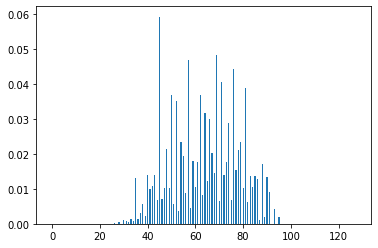

In [124]:
# tonal hist
data = tm.tonal_hist(tracks_blob_notes)

plt.bar(np.arange(0, 128), data, width = 0.5)

np.save(os.path.join(dataset_meta_dir, 'evals', 'tonal_hist.npy'), data)
plt.savefig(os.path.join(dataset_meta_dir, 'evals', 'tonal_hist.png'))

plt.show()

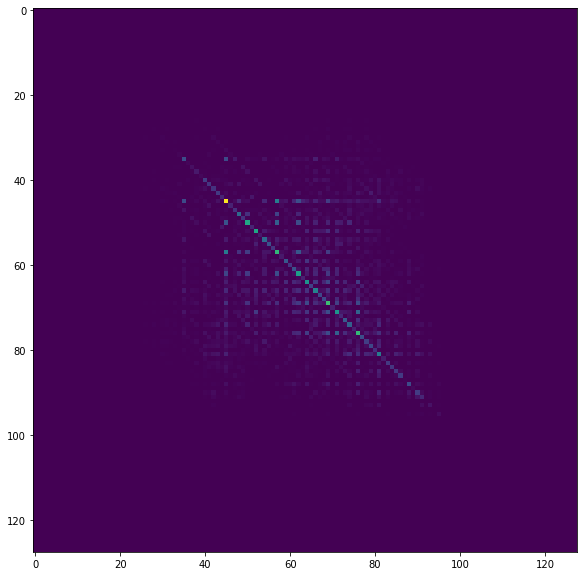

In [128]:
# tonal transition matrix
data = tm.tonal_transition_matrix(tracks_blob_notes)

fig = plt.figure(figsize = (10,10)) # create a 5 x 5 figure 
ax1 = fig.add_subplot(111)
ax1.imshow(data, interpolation='none')
# ax1.set_title('larger figure')

np.save(os.path.join(dataset_meta_dir, 'evals', 'tonal_transition.npy'), data)
plt.savefig(os.path.join(dataset_meta_dir, 'evals', 'tonal_transition.png'))

plt.show()


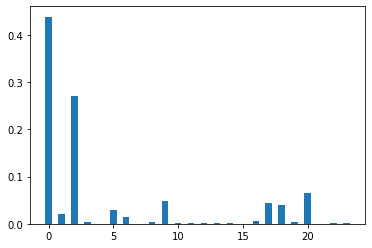

In [125]:
# rythm hist
data = rm.rythm_hist(tracks_blob_durations)

plt.bar(np.arange(0, 24), data, width = 0.5)

np.save(os.path.join(dataset_meta_dir, 'evals', 'rythm_hist.npy'), data)
plt.savefig(os.path.join(dataset_meta_dir, 'evals', 'rythm_hist.png'))

plt.show()

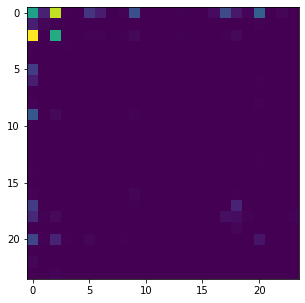

In [127]:
# duration transition matrix
data = rm.rythm_transition_matrix(tracks_blob_durations)

fig = plt.figure(figsize = (5,5)) # create a 5 x 5 figure 
ax1 = fig.add_subplot(111)
ax1.imshow(data, interpolation='none')
# ax1.set_title('larger figure')

np.save(os.path.join(dataset_meta_dir, 'evals', 'rythm_transition.npy'), data)
plt.savefig(os.path.join(dataset_meta_dir, 'evals', 'rythm_transition.png'))

plt.show()